In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor  
from sklearn.metrics import r2_score        
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  # 한글 깨지지 않게
matplotlib.rcParams['axes.unicode_minus'] = False

In [38]:
boston = load_boston()

In [39]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [40]:
x_data = boston_df.iloc[:, :-1]
y_data = boston_df.iloc[:, -1]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

Make Pipeline

In [42]:
# from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDRegressor()) # 스케일 먼저 그다음 regressor 해야함 (순서 중요)
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [43]:
model.score(x_train, y_train) # 결정계수 R

0.7275422958081248

In [44]:
model.score(x_test, y_test)

0.7618329773137481

In [45]:
model.predict([x_test.values[0]]) 
# 파이프 라인하면 알아서 해주니까...이후에 predict을 위한 값을 넣을때도 스케일링이 필요없어

array([31.87279332])

In [ ]:
sl(target).feature(sw, pl, pw)
문제 = sw:3.0, pl:1.4, pw:0.2인 경우 sl를 예측하기
1. scale 
2. train, test
3. train, test score
4. 예측

파이프라인을 이용하여 구하시오.

In [47]:
iris=load_iris()
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df.head()

iris_df.columns=['sl','sw','pl','pw']
x_data=iris_df[['sw','pl','pw']]
y_data=iris_df[['sl']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

model=make_pipeline(StandardScaler(),SGDRegressor() )
model.fit(x_train, y_train)

model.score(x_train, y_train)

model.score(x_test, y_test)

p=model.predict([[3.0,1.4,0.2]])
p

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4.74362457])

### 교차검증(데이터가 작은 경우)
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
- 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증


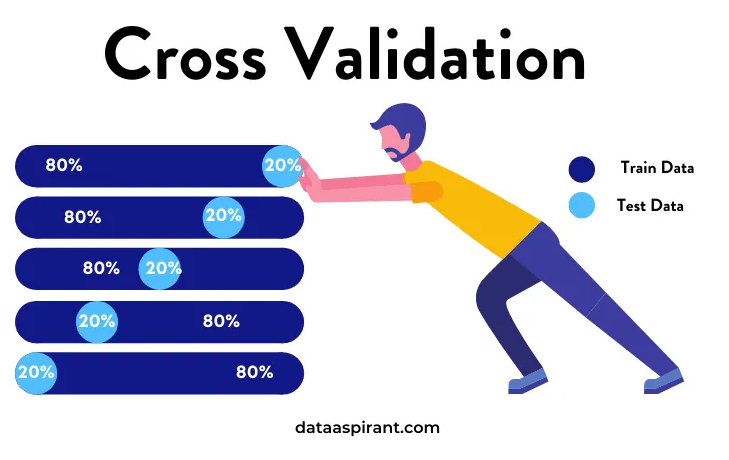

In [49]:
r2scores = cross_val_score( model, x_data, y_data ,cv=5, scoring='r2', verbose=1)
print( r2scores )
print( r2scores.mean() )
# 전체 데이터를 가지고 5개(cv=5)로 조각을 내는데 그 조각을 랜덤으로 냄

[0.54139172 0.79520625 0.07576838 0.6835423  0.42159805]
0.5035013407686305


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d a

In [ ]:
1. 상관관계
2. 다중공선성
check  후

3. scale
4. 학습 

# 다중 공선성
다중공선성 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상

X1은 일평균 음주량을 독립 변수 X2는 혈중 알코올 농도 둘의 상관관계가 높아 설명령이 약해진다

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF 임. 
VIF (Variance inflation Factors 분산팽창요인)
- 안전 : VIF < 5
- 주의 : 5 < VIF < 10
- 위험 : 10 < VIF


In [50]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [51]:
# heatmap 라이브러리 import
import seaborn as sb

colormap

    
https://matplotlib.org/stable/tutorials/colors/colormaps.html

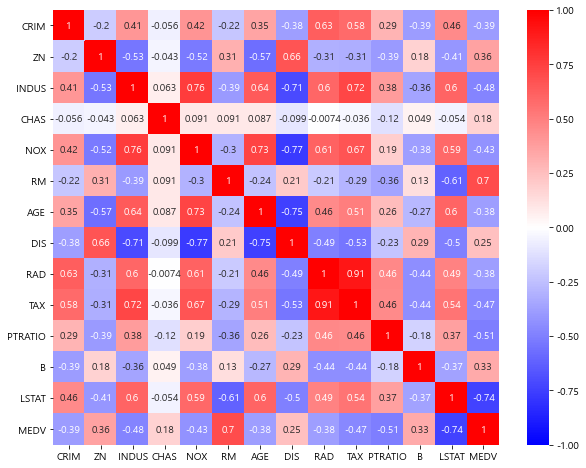

In [58]:
plt.figure(figsize=(10, 8)) # 차트 사이즈 키우기 (inch 단위)
sb.heatmap(boston_df.corr(),annot=True, vmin=-1, vmax=1, cmap='bwr') 
# annot=True 상관관계 값을 map에 나타냄
# cmap = 컬러 변경할 수 있음. 위의 colormap 사이트 참고
plt.show()

In [64]:
boston_df.shape # 행렬 (506, 14)
boston_df.shape[1] 

14

In [65]:
boston_df.values.shape

(506, 14)

In [59]:
# 분산팽창요인(VLF) - 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
# 다중 공선성 확인 할때 x 특성값만 확인 하면 되는데, 여기서는 전체를 확인하려고 boston_df.values로 확인함
vif['VIF Factor']= [ variance_inflation_factor(boston_df.values, i )  for i in range( boston_df.shape[1] ) ]
vif['features'] = boston_df.columns
vif 

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


==> 특성데이터가 많은경우: 다중공선성(컬럼제거), 타겟(라벨)에 상관관계가 낮은 컬럼

In [82]:
from sklearn.datasets import fetch_california_housing

In [83]:
cal = fetch_california_housing()
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [84]:
cal['data'].shape

(20640, 8)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |


<연습문제>



캘리포니아 주택가격을 이용하여   crossvalidation 값을 구하시요.

다중공선성을 확인한후에 다중공선성이 높은 컬럼을 제외하고 학습하여 crossvalidation값을 확인하시요

In [85]:
cal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [86]:
cal['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [88]:
cal_df = pd.DataFrame(cal['data'], columns=cal['feature_names'])
cal_df['MEDV'] = cal.target
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [89]:
# 데이터 추출
x_data = cal_df.iloc[:,:-1]
y_data = cal_df.iloc[:,-1]

# train / test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

# 파이프라인
model = make_pipeline(StandardScaler(),LinearRegression()) # scaling한 다음 바로 SGDRegressor() 적용
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [90]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6083741964648377
0.5965968374812352


In [91]:
# cross validation
r2Score = cross_val_score(model,x_data,y_data,cv=5,scoring='r2',verbose=1)
print(r2Score)
print(r2Score.mean())

[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
0.5530311140279566


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [94]:
# VIF 확인하고 3가지 컬럼 제거 
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(cal_df.values,i) for i in range(cal_df.shape[1])]
vif['features'] = cal_df.columns
vif

,VIF Factor,features
0,19.624998,MedInc
1,7.592663,HouseAge
2,47.956351,AveRooms
3,45.358192,AveBedrms
4,2.936078,Population
5,1.099530,AveOccup
6,568.497332,Latitude
7,640.064211,Longitude
8,9.285659,MEDV


In [95]:
vifX = vif.iloc[vif['VIF Factor'].nlargest(2).index].features.values.tolist()
vifX

['Longitude', 'Latitude']

In [96]:
calDF = cal_df.drop(columns=vifX)
calDF

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [97]:
x_data = calDF.iloc[:,:-1]
y_data = calDF.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

model = make_pipeline(StandardScaler(),LinearRegression()) # scaling한 다음 바로 SGDRegressor() 적용
model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

r2Score = cross_val_score(model,x_data,y_data,cv=10,scoring='r2',verbose=1)
print(r2Score)
print(r2Score.mean())

0.5409848489986098
0.5332575128677686
[0.53071132 0.4839093  0.38987981 0.48402382 0.5075654  0.49644267
 0.17024893 0.4105453  0.29452113 0.4514216 ]
0.421926928373032


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
